In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the datasets
file_path_glass = 'C:/Users/Kuldeep/glass.csv'
file_path_synthetic = 'C:/Users/Kuldeep/A3-data.txt'

glass_data = pd.read_csv(file_path_glass)
synthetic_data = np.loadtxt(file_path_synthetic, delimiter=',', skiprows=1)

# Standardize the features
scaler = StandardScaler()
glass_features = glass_data.iloc[:, :-1].values
glass_labels = glass_data.iloc[:, -1].values
standardized_glass_features = scaler.fit_transform(glass_features)

synthetic_features = synthetic_data[:, :-1]
synthetic_labels = synthetic_data[:, -1]
standardized_synthetic_features = scaler.fit_transform(synthetic_features)

# Save the standardized features and labels for later use
standardized_glass_data = {
    'features': standardized_glass_features,
    'labels': glass_labels
}

synthetic_data_dict = {
    'features': standardized_synthetic_features,
    'labels': synthetic_labels
}


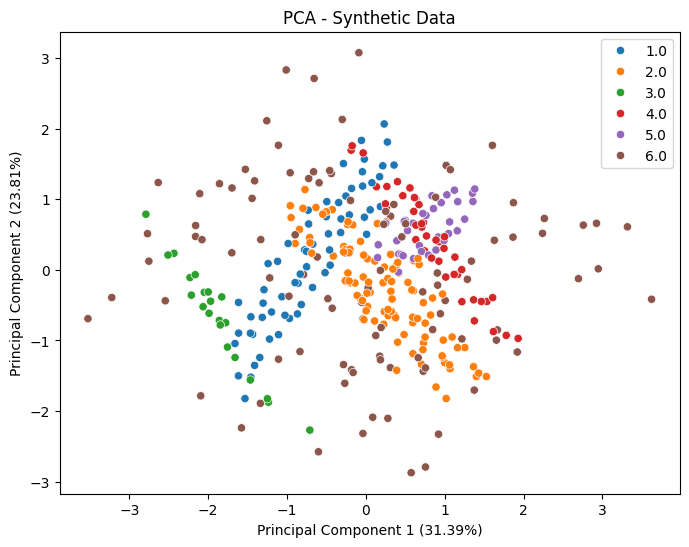

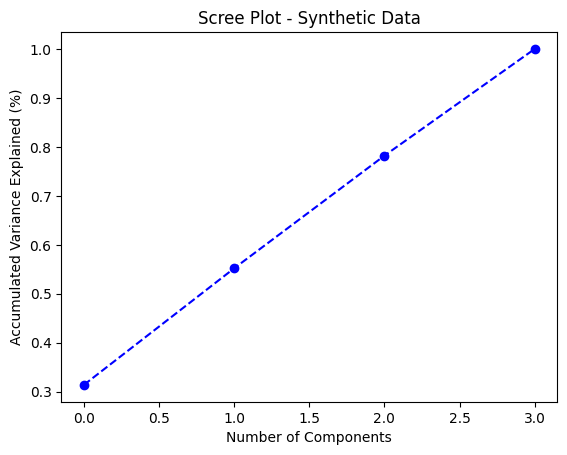

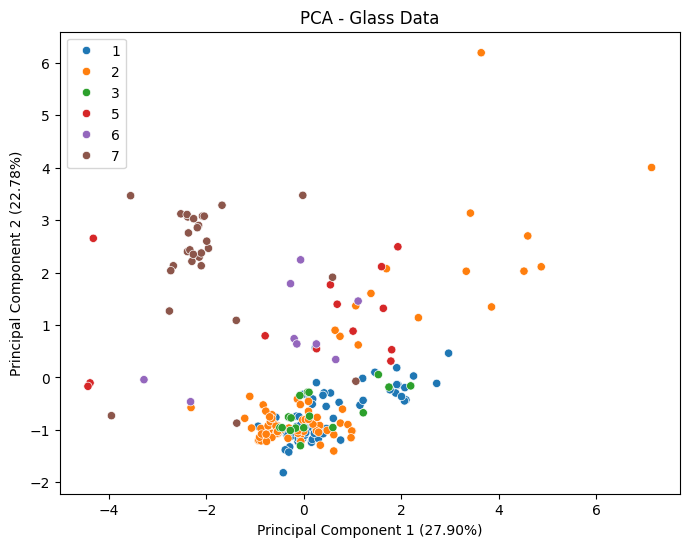

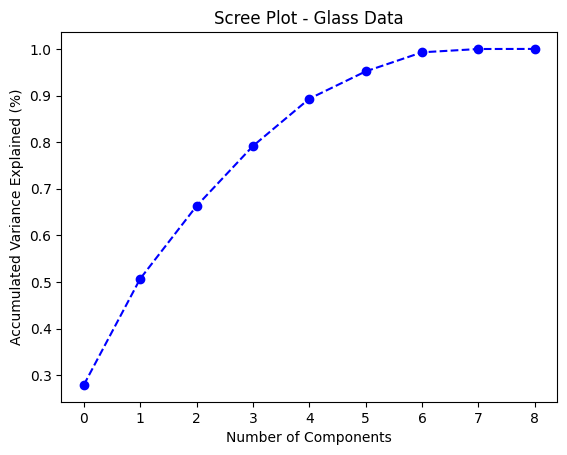

In [4]:
# Part 2 - PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load standardized data from Part 1
standardized_synthetic_features = synthetic_data_dict['features']
synthetic_labels = synthetic_data_dict['labels']

# PCA Analysis for Synthetic Data
pca_synthetic = PCA(n_components=2)
synthetic_pca = pca_synthetic.fit_transform(standardized_synthetic_features)
explained_variance_synthetic = pca_synthetic.explained_variance_ratio_

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=synthetic_pca[:, 0], y=synthetic_pca[:, 1], hue=synthetic_labels, palette='tab10', legend='full')
plt.title('PCA - Synthetic Data')
plt.xlabel(f'Principal Component 1 ({explained_variance_synthetic[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_synthetic[1]*100:.2f}%)')
plt.legend(loc='best')
plt.show()

# Scree plot with accumulated variance
pca_synthetic_full = PCA().fit(standardized_synthetic_features)
plt.figure()
plt.plot(np.cumsum(pca_synthetic_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Accumulated Variance Explained (%)')
plt.title('Scree Plot - Synthetic Data')
plt.show()

# Load standardized data from Part 1
standardized_glass_features = standardized_glass_data['features']
glass_labels = standardized_glass_data['labels']

# PCA Analysis for Glass Data
pca_glass = PCA(n_components=2)
glass_pca = pca_glass.fit_transform(standardized_glass_features)
explained_variance_glass = pca_glass.explained_variance_ratio_

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=glass_pca[:, 0], y=glass_pca[:, 1], hue=glass_labels, palette='tab10', legend='full')
plt.title('PCA - Glass Data')
plt.xlabel(f'Principal Component 1 ({explained_variance_glass[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_glass[1]*100:.2f}%)')
plt.legend(loc='best')
plt.show()

# Scree plot with accumulated variance
pca_glass_full = PCA().fit(standardized_glass_features)
plt.figure()
plt.plot(np.cumsum(pca_glass_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Accumulated Variance Explained (%)')
plt.title('Scree Plot - Glass Data')
plt.show()


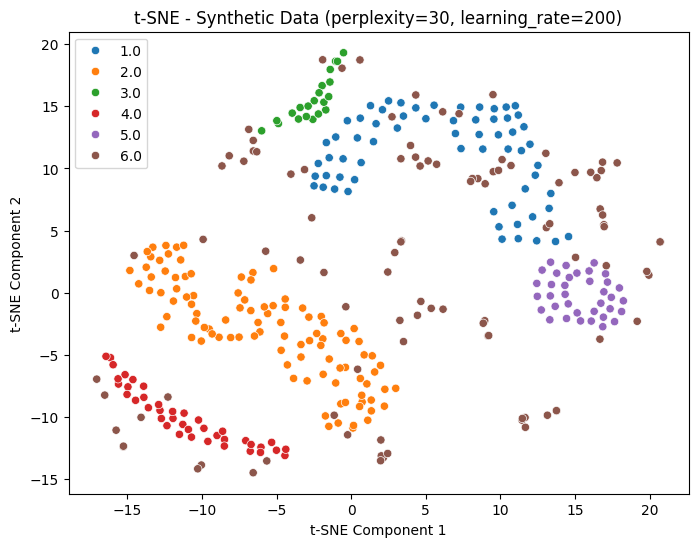

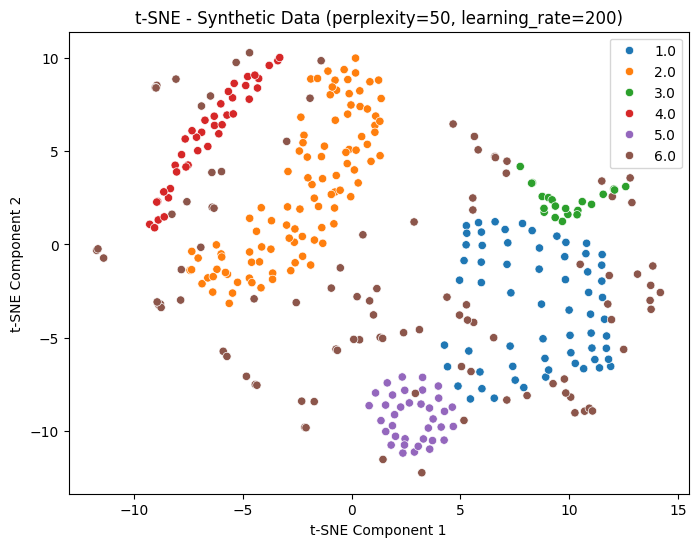

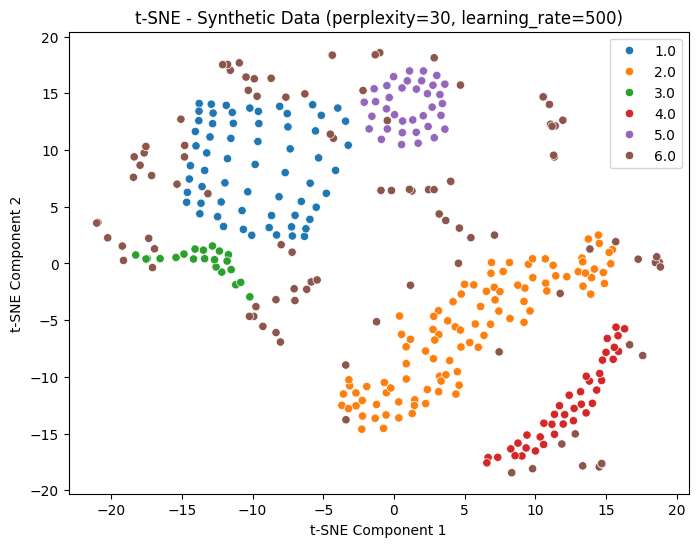

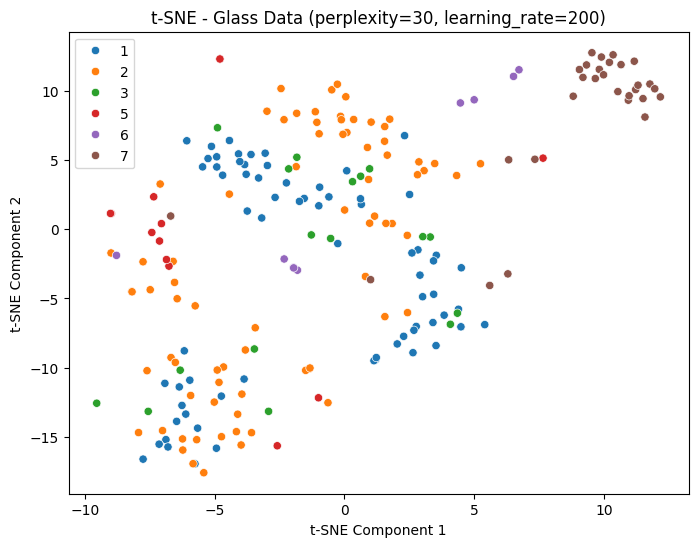

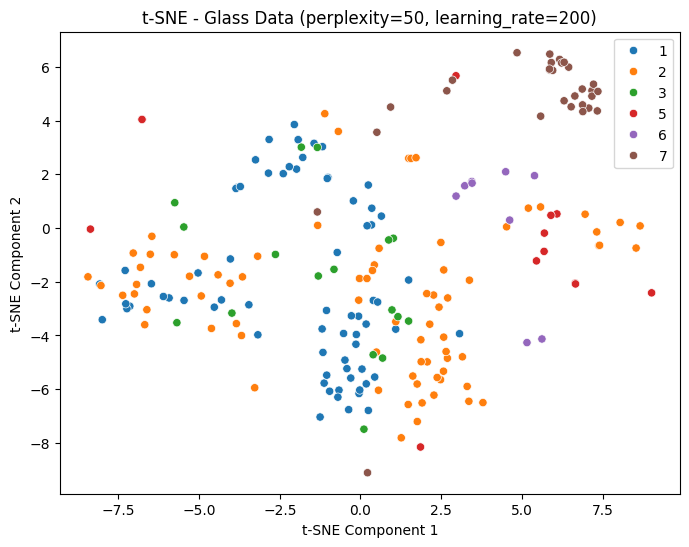

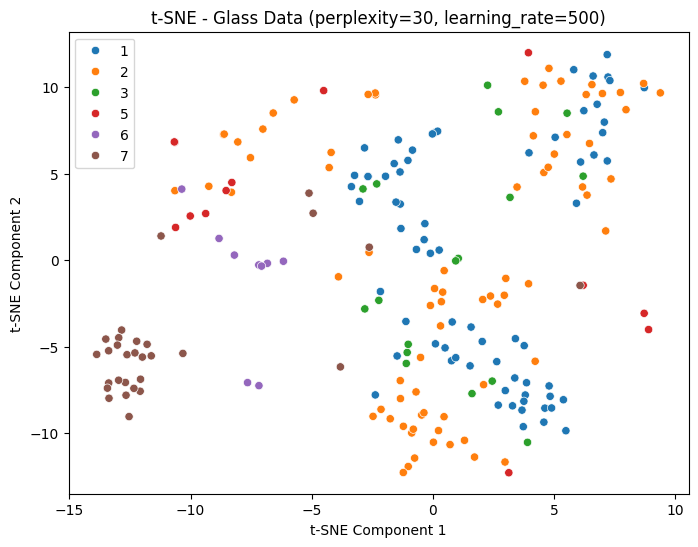

In [5]:
# t-SNE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Function to perform t-SNE and plot the results
def tsne_plot(data, labels, title, perplexity, learning_rate):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=1000, random_state=42)
    tsne_results = tsne.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='tab10', legend='full')
    plt.title(f'{title} (perplexity={perplexity}, learning_rate={learning_rate})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(loc='best')
    plt.show()

# Use the standardized glass data and synthetic data directly
standardized_glass_features = standardized_glass_data['features']
glass_labels = standardized_glass_data['labels']
synthetic_features = synthetic_data_dict['features']
synthetic_labels = synthetic_data_dict['labels']

# t-SNE Analysis for Synthetic Data with different parameters
tsne_plot(synthetic_features, synthetic_labels, 't-SNE - Synthetic Data', perplexity=30, learning_rate=200)
tsne_plot(synthetic_features, synthetic_labels, 't-SNE - Synthetic Data', perplexity=50, learning_rate=200)
tsne_plot(synthetic_features, synthetic_labels, 't-SNE - Synthetic Data', perplexity=30, learning_rate=500)

# t-SNE Analysis for Glass Data with different parameters
tsne_plot(standardized_glass_features, glass_labels, 't-SNE - Glass Data', perplexity=30, learning_rate=200)
tsne_plot(standardized_glass_features, glass_labels, 't-SNE - Glass Data', perplexity=50, learning_rate=200)
tsne_plot(standardized_glass_features, glass_labels, 't-SNE - Glass Data', perplexity=30, learning_rate=500)


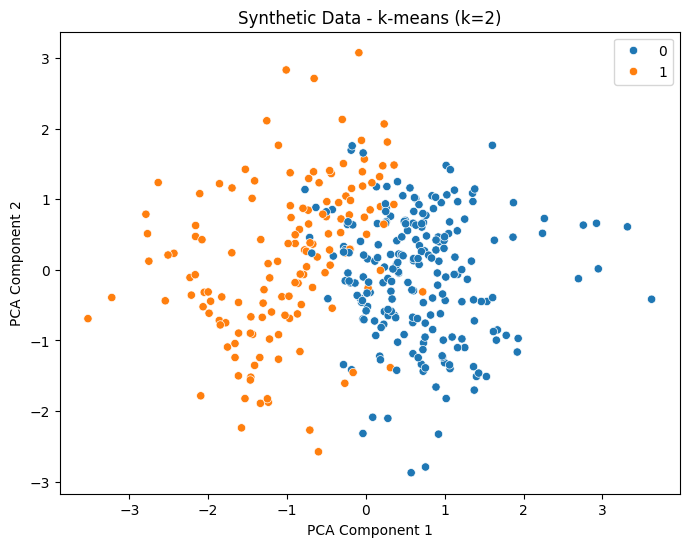

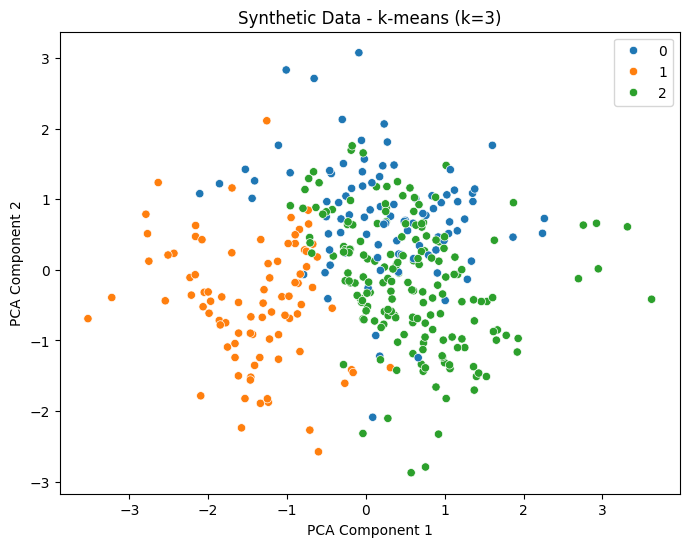

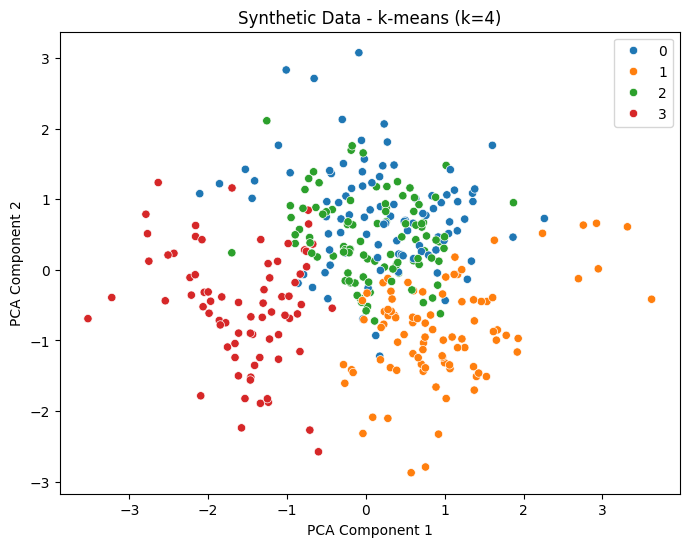

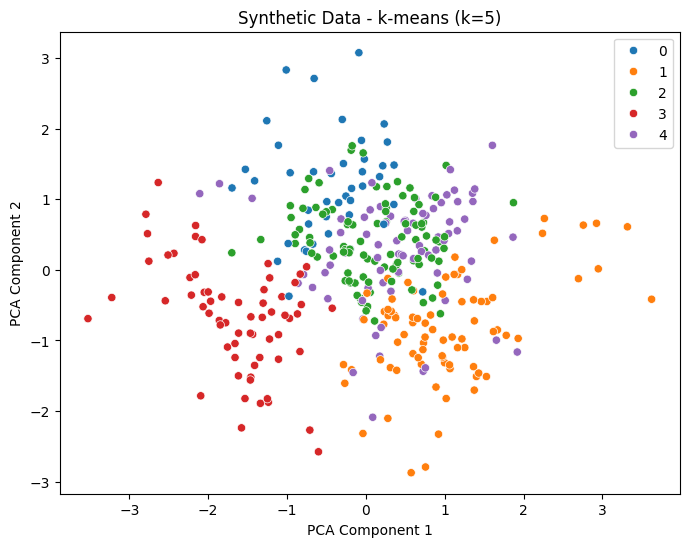

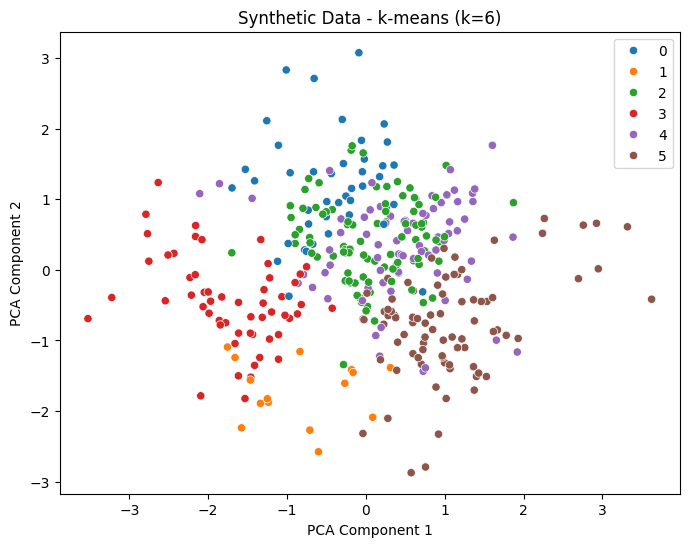

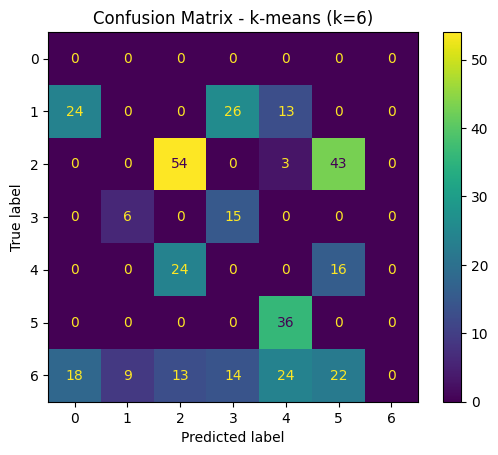

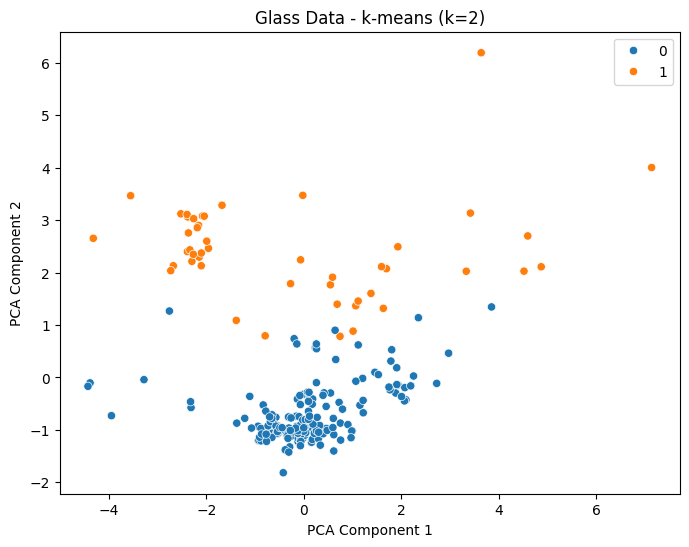

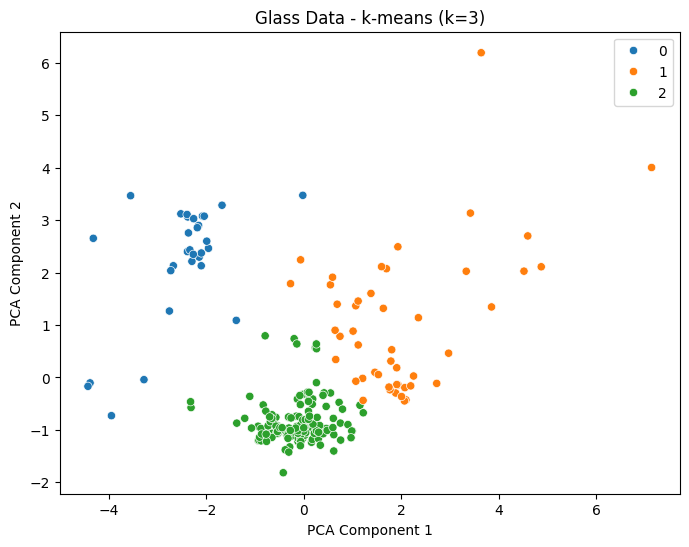

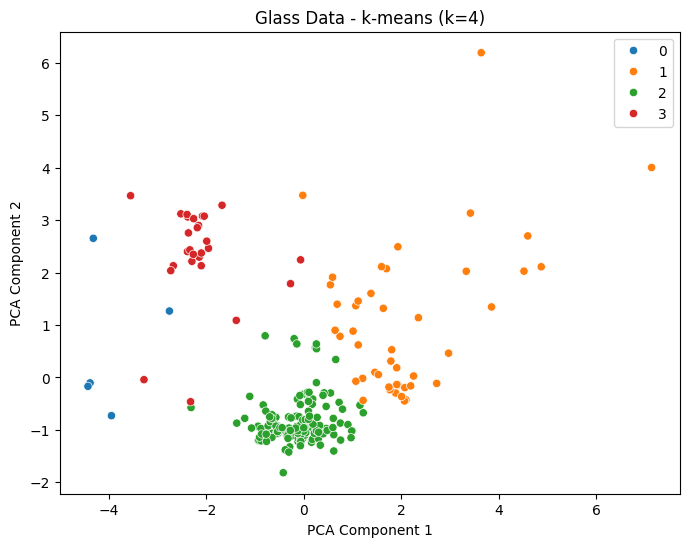

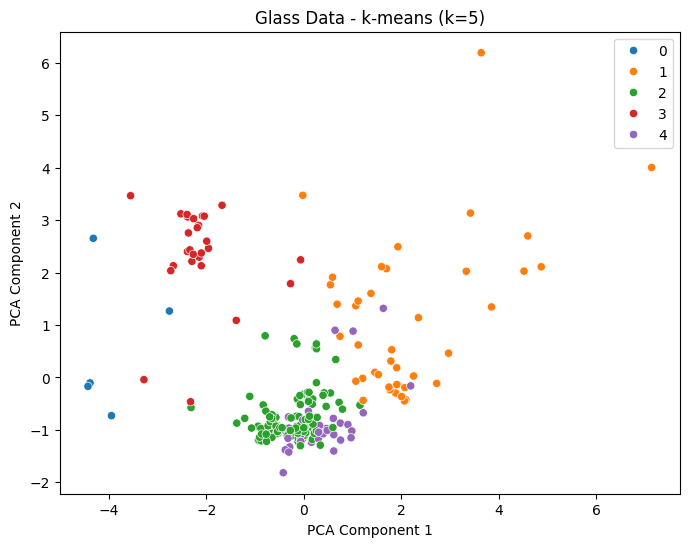

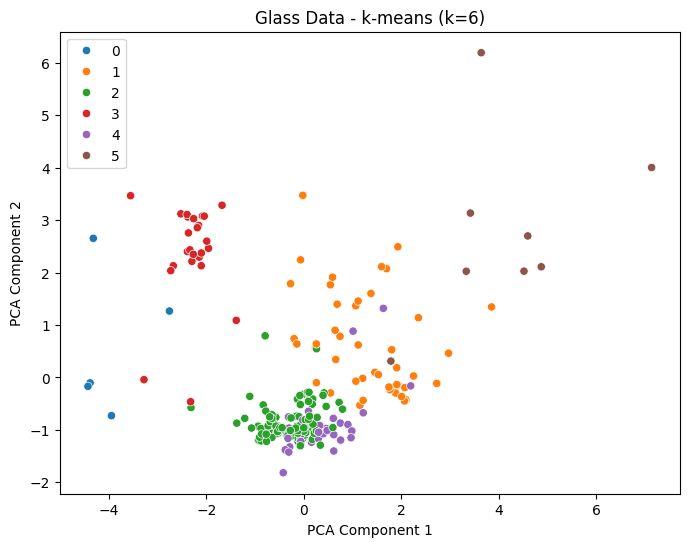

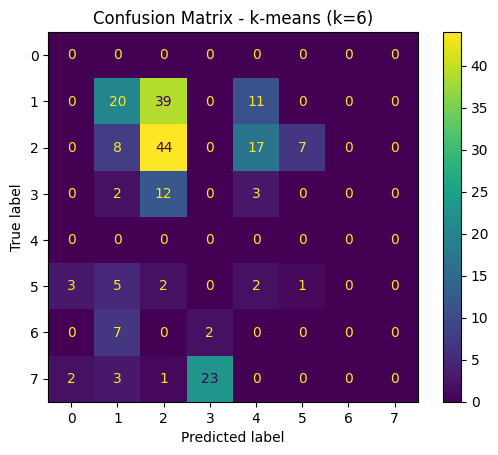

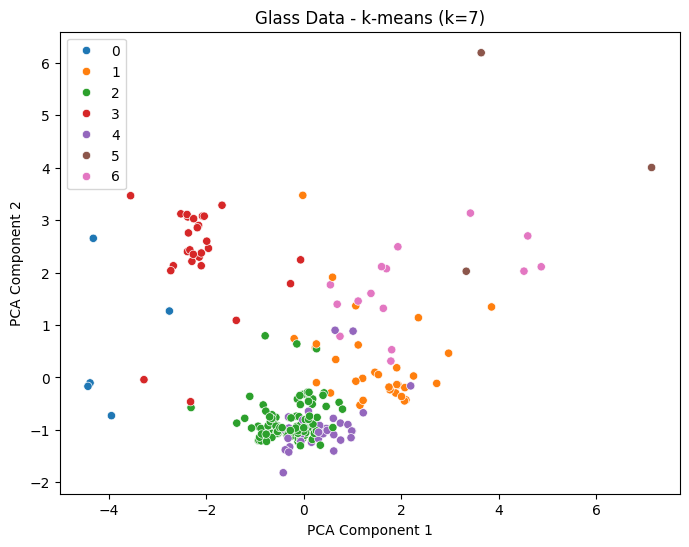

In [6]:
# k-means

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to perform k-means and plot the results
def kmeans_plot(data, labels, title, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    
    # Perform PCA for visualization
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='tab10', legend='full')
    plt.title(f'{title} - k-means (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best')
    plt.show()
    
    # If k equals the real number of classes, display a confusion matrix
    if k == len(np.unique(labels)):
        conf_matrix = confusion_matrix(labels, kmeans_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
        disp.plot()
        plt.title(f'Confusion Matrix - k-means (k={k})')
        plt.show()

# Use the standardized glass data and synthetic data directly
standardized_glass_features = standardized_glass_data['features']
glass_labels = standardized_glass_data['labels']
synthetic_features = synthetic_data_dict['features']
synthetic_labels = synthetic_data_dict['labels']

# k-means Analysis for Synthetic Data
for k in range(2, 7):  # Example range, adjust as needed
    kmeans_plot(synthetic_features, synthetic_labels, 'Synthetic Data', k)

# k-means Analysis for Glass Data
for k in range(2, 8):  # Example range, adjust as needed
    kmeans_plot(standardized_glass_features, glass_labels, 'Glass Data', k)


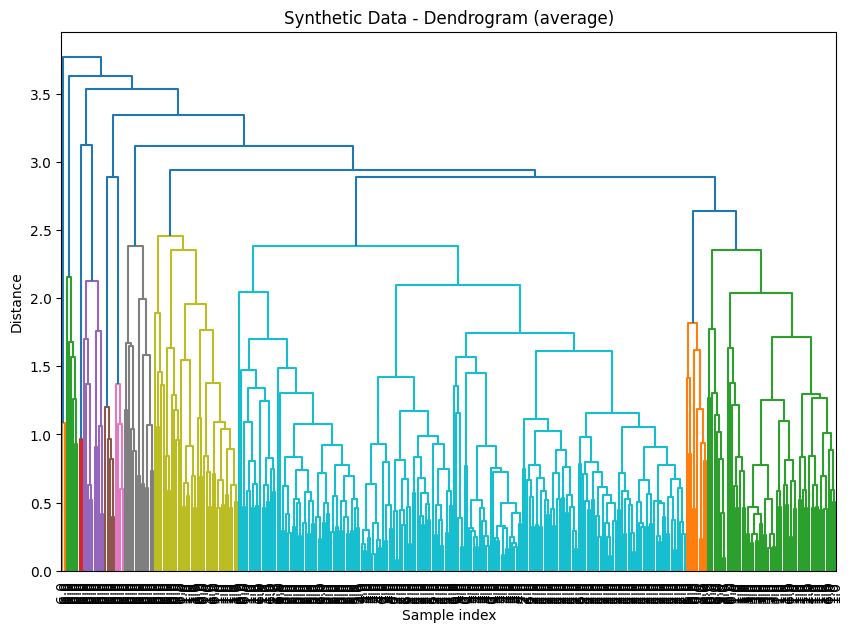

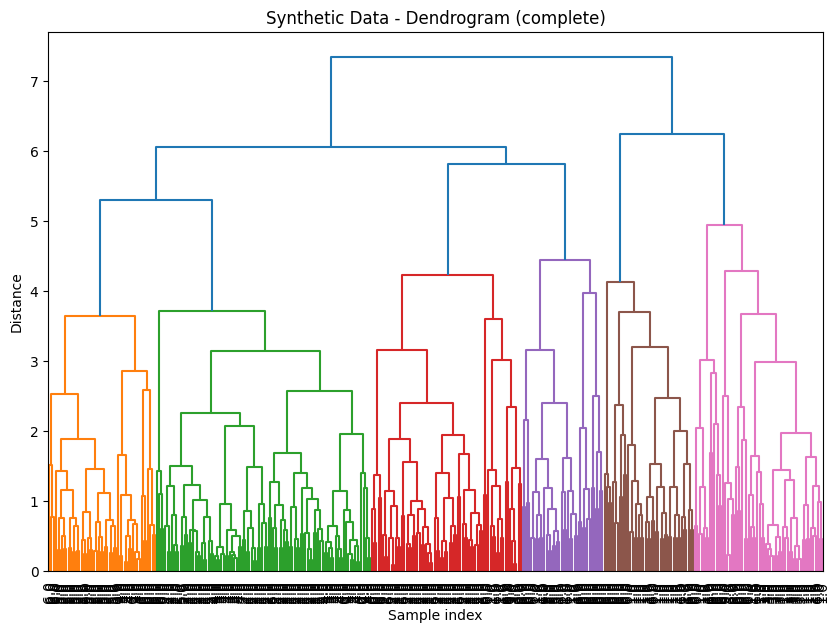

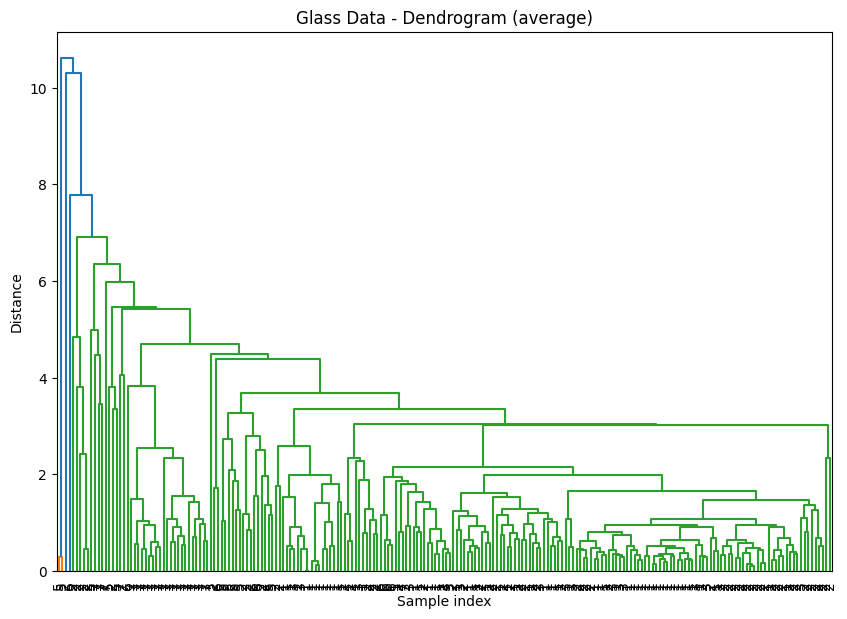

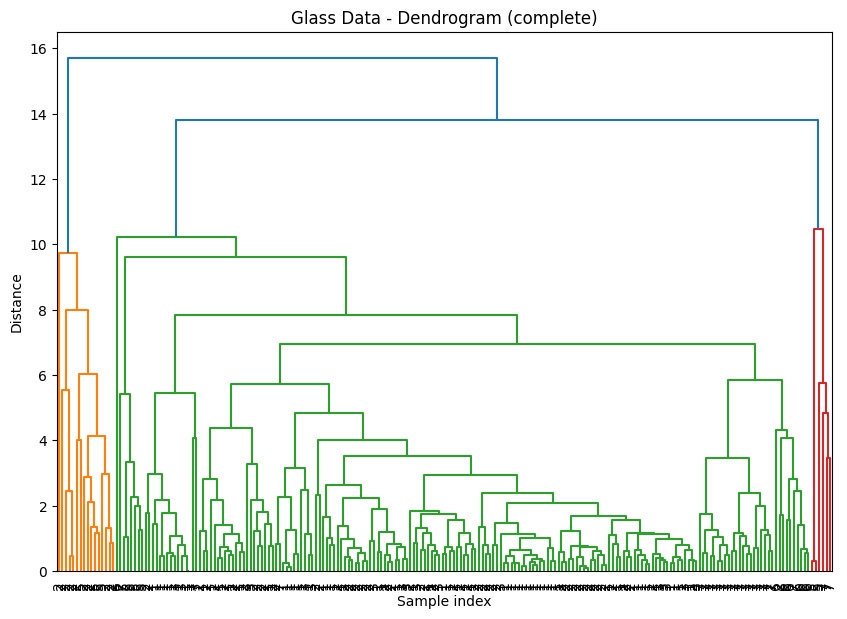

In [7]:
# AHC

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Function to perform AHC and plot the dendrogram
def ahc_plot(data, labels, method, title):
    # Compute the condensed distance matrix
    condensed_distance_matrix = pdist(data, metric='euclidean')
    
    # Perform hierarchical/agglomerative clustering
    Z = linkage(condensed_distance_matrix, method=method)
    
    # Create a color palette with a unique color for each class
    unique_labels = np.unique(labels)
    palette = sns.color_palette('tab10', len(unique_labels))
    label_colors = {label: palette[i] for i, label in enumerate(unique_labels)}
    
    # Function to get the color of each leaf
    def get_leaf_colors(idx):
        return label_colors[labels[idx]]

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(
        Z,
        labels=labels,
        leaf_rotation=90,
        leaf_font_size=10,
        color_threshold=0.7 * max(Z[:, 2])
    )
    plt.title(f'{title} - Dendrogram ({method})')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Use the standardized glass data and synthetic data directly
standardized_glass_features = standardized_glass_data['features']
glass_labels = standardized_glass_data['labels']
synthetic_features = synthetic_data_dict['features']
synthetic_labels = synthetic_data_dict['labels']

# AHC Analysis for Synthetic Data using UPGMA and CL methods
ahc_plot(synthetic_features, synthetic_labels, method='average', title='Synthetic Data')
ahc_plot(synthetic_features, synthetic_labels, method='complete', title='Synthetic Data')

# AHC Analysis for Glass Data using UPGMA and CL methods
ahc_plot(standardized_glass_features, glass_labels, method='average', title='Glass Data')
ahc_plot(standardized_glass_features, glass_labels, method='complete', title='Glass Data')


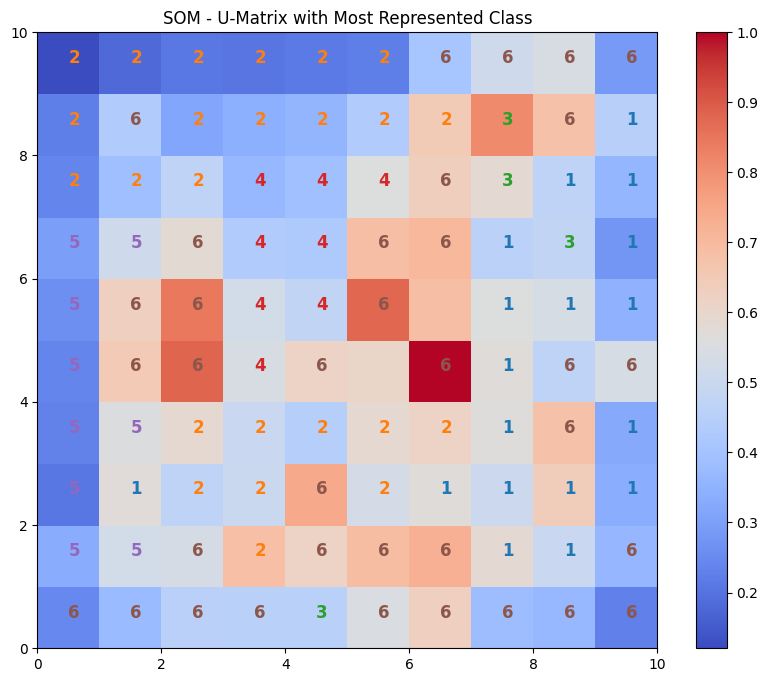

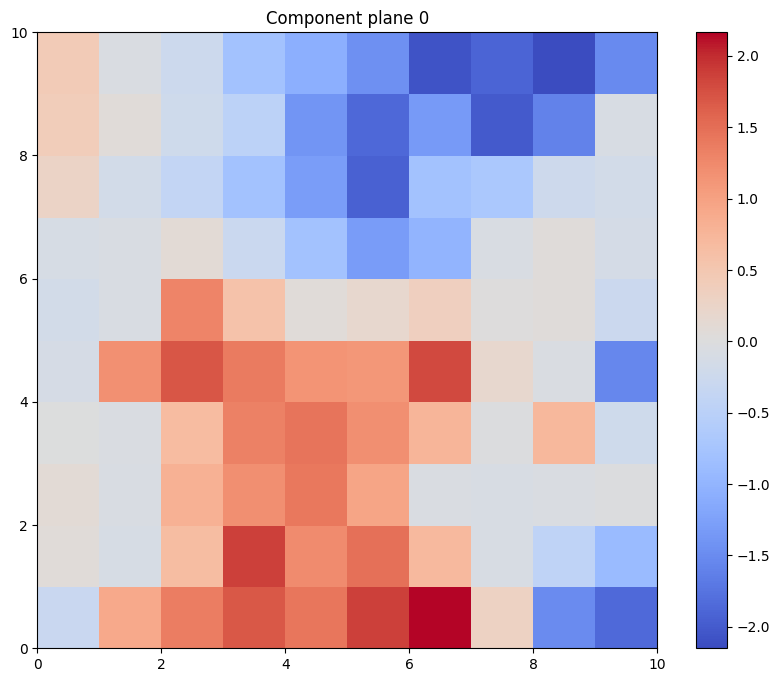

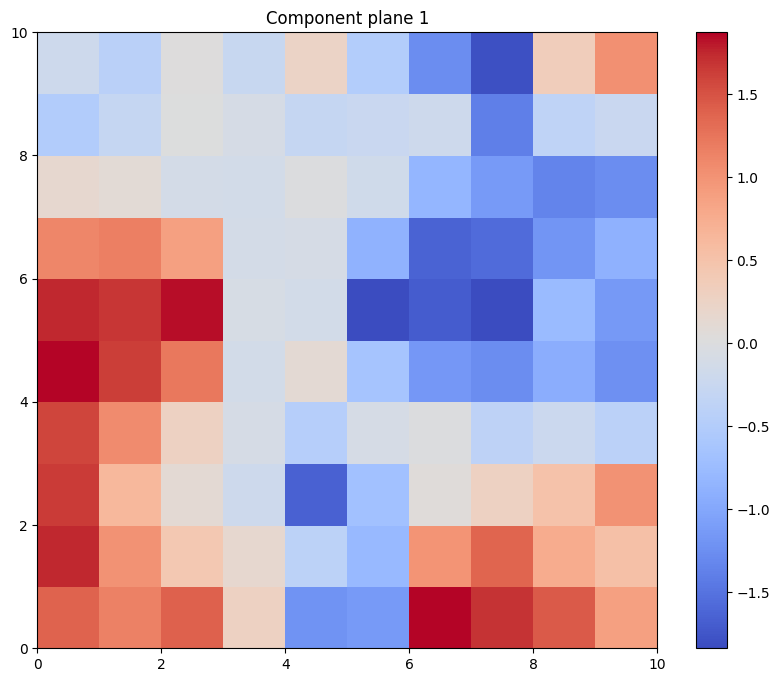

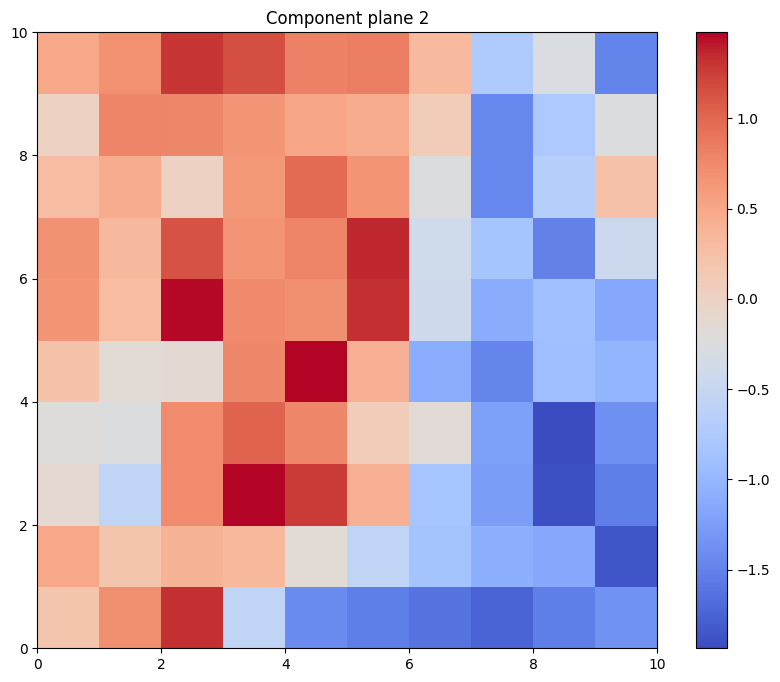

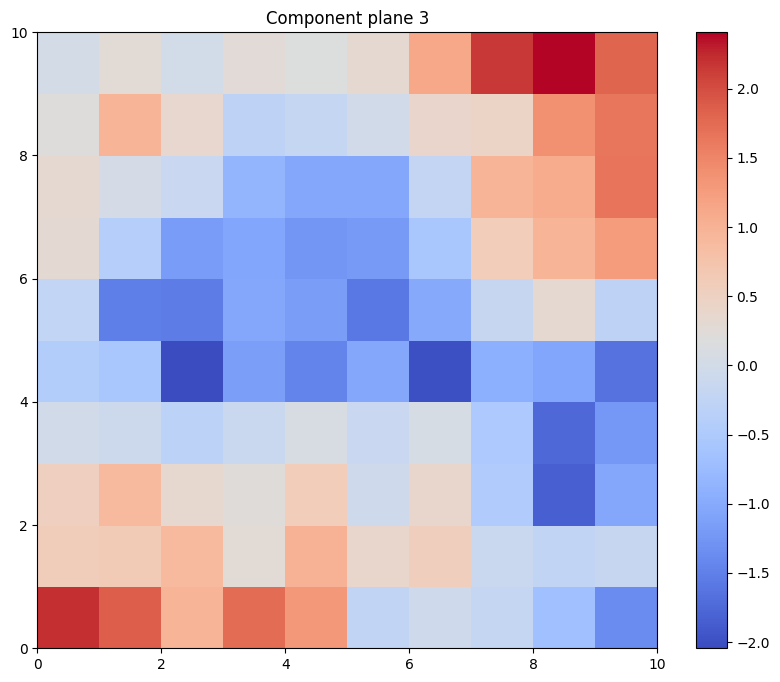

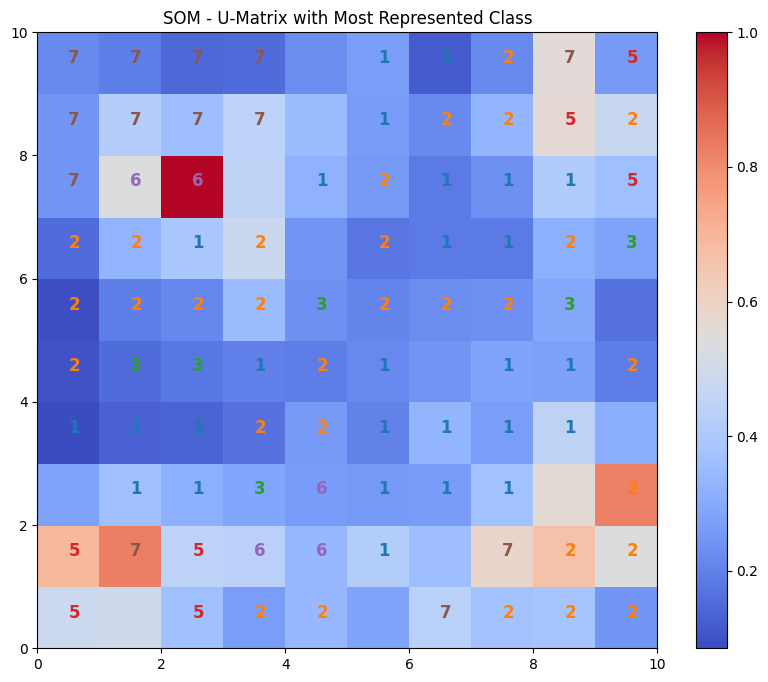

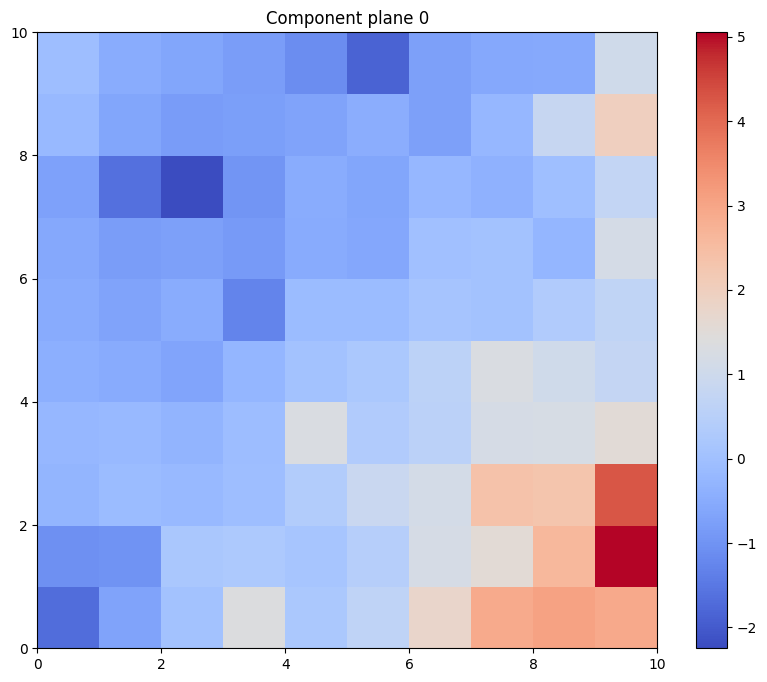

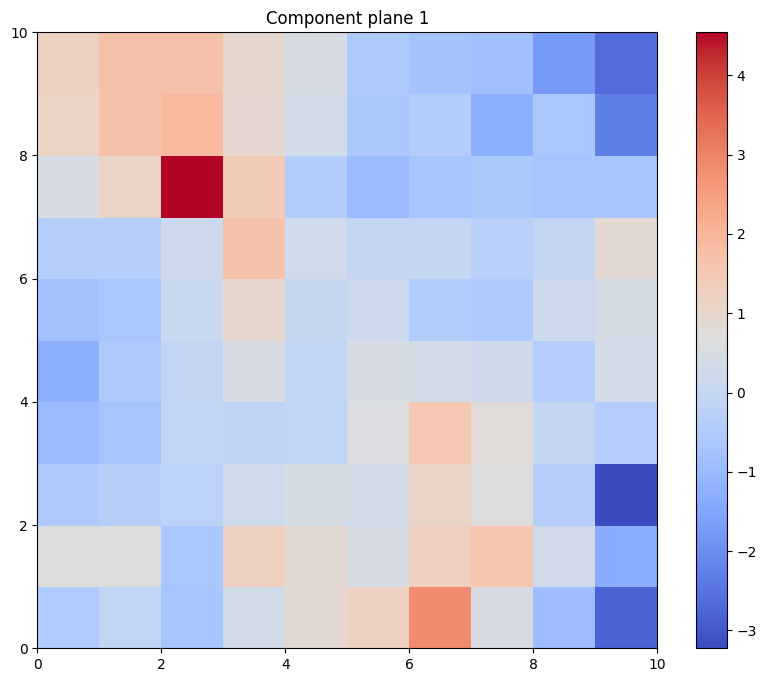

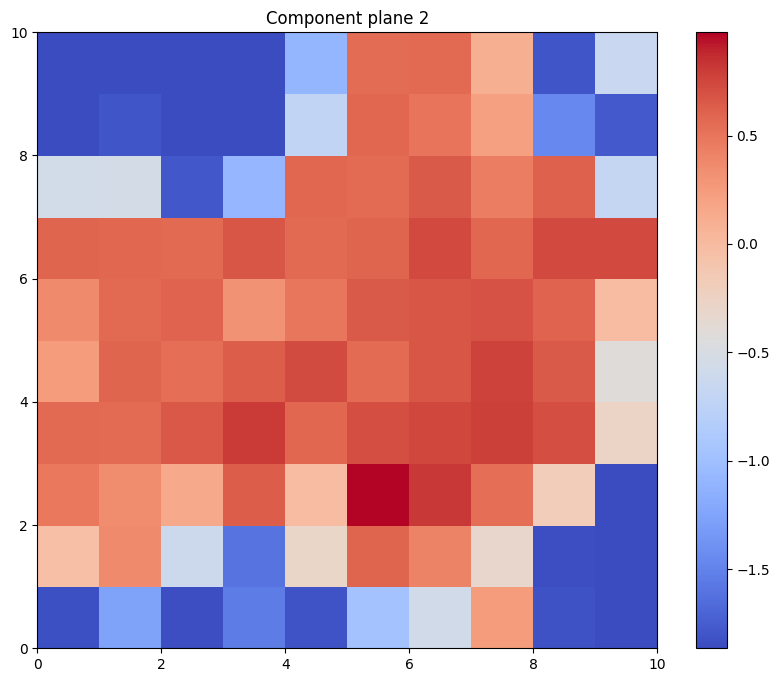

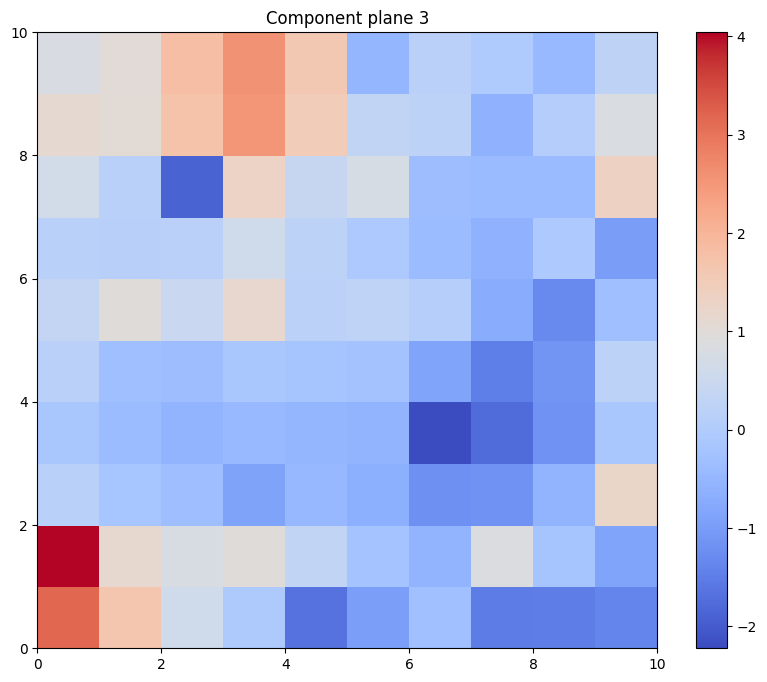

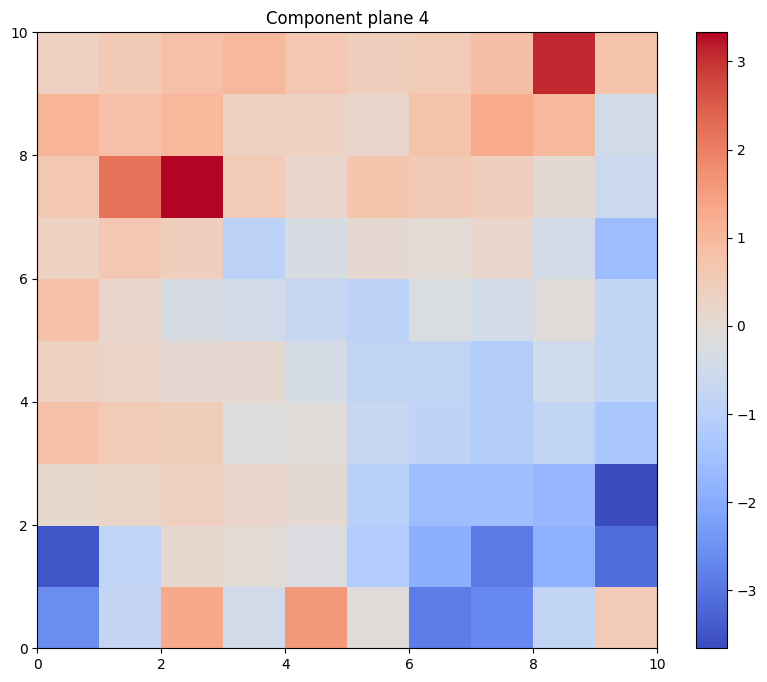

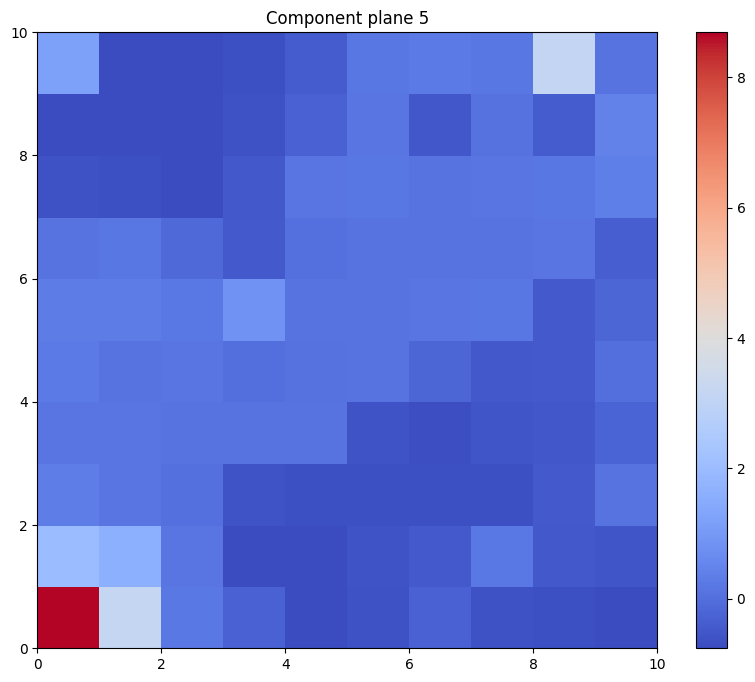

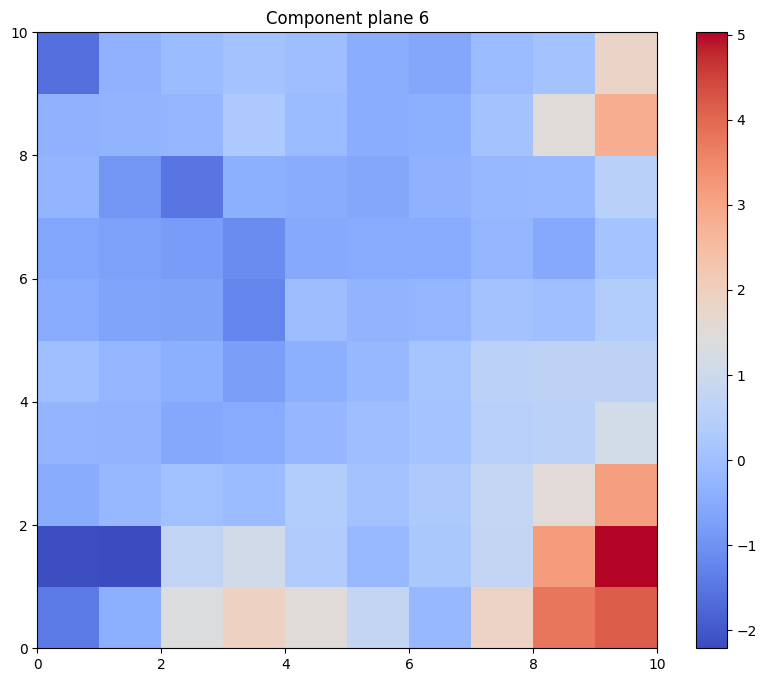

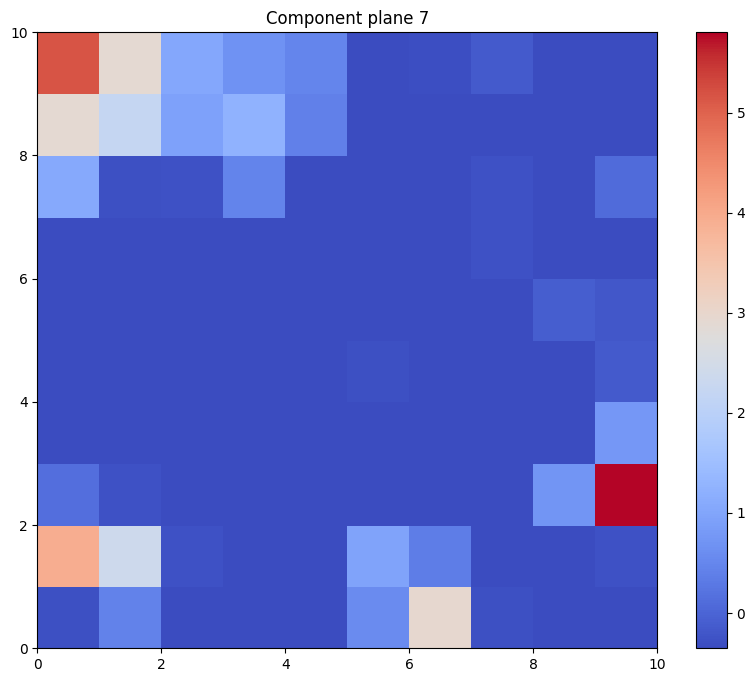

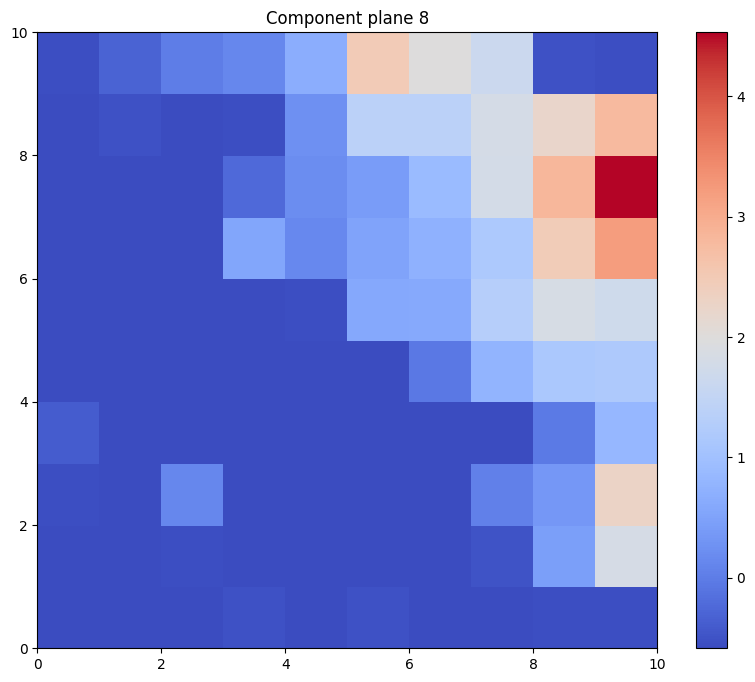

In [8]:
# SOM

from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train SOM and plot the results
def som_analysis(data, labels, x_size, y_size, learning_rate, sigma):
    som = MiniSom(x_size, y_size, data.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian', random_seed=42)
    som.train_random(data, 10000)
    
    # Plot the u-matrix
    plt.figure(figsize=(10, 8))
    plt.pcolor(som.distance_map().T, cmap='coolwarm')  # distance map as background
    plt.colorbar()
    
    # Create a color palette with a unique color for each class
    unique_labels = np.unique(labels)
    palette = sns.color_palette('tab10', len(unique_labels))
    label_colors = {label: palette[i] for i, label in enumerate(unique_labels)}
    
    # Plot the most represented class in each position
    for (x, y), win_position in som.win_map(data).items():
        if len(win_position) > 0:
            win_labels = [labels[np.where(np.all(data == wp, axis=1))[0][0]] for wp in win_position]
            most_frequent_label = np.argmax(np.bincount(win_labels))
            plt.text(x + 0.5, y + 0.5, str(most_frequent_label),
                     color=label_colors[most_frequent_label],
                     fontdict={'weight': 'bold', 'size': 12})
    
    plt.title('SOM - U-Matrix with Most Represented Class')
    plt.show()

    # Plot the component planes
    for i in range(data.shape[1]):
        plt.figure(figsize=(10, 8))
        plt.title(f'Component plane {i}')
        plt.pcolor(som.get_weights()[:, :, i].T, cmap='coolwarm')
        plt.colorbar()
        plt.show()

# Use the standardized glass data and synthetic data directly
standardized_glass_features = standardized_glass_data['features']
glass_labels = standardized_glass_data['labels']
synthetic_features = synthetic_data_dict['features']
synthetic_labels = synthetic_data_dict['labels']

# SOM Analysis for Synthetic Data
som_analysis(synthetic_features, synthetic_labels, x_size=10, y_size=10, learning_rate=0.5, sigma=1.0)

# SOM Analysis for Glass Data
som_analysis(standardized_glass_features, glass_labels, x_size=10, y_size=10, learning_rate=0.5, sigma=1.0)
